In [1]:
# Importing necessary libraries
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For creating visualizations
import seaborn as sns  # For statistical data visualization
import numpy as np  # For numerical operations

from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.preprocessing import StandardScaler  # For standardizing features
from sklearn.decomposition import PCA  # For Principal Component Analysis
from sklearn.cluster import KMeans  # For KMeans clustering algorithm

import warnings  # For suppressing warnings
warnings.filterwarnings("ignore")  # Ignore any warnings

In [2]:
# Load EV Charging Station Dataset from CSV file
df3 = pd.read_excel("D:\\Project-2.2\\Datasets\\3.EV-Market-India-Dataset.xlsx")

# Display the first few rows of the dataset
df3.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,No,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


## **Number of EV Models Manufactured by Each Brand:**

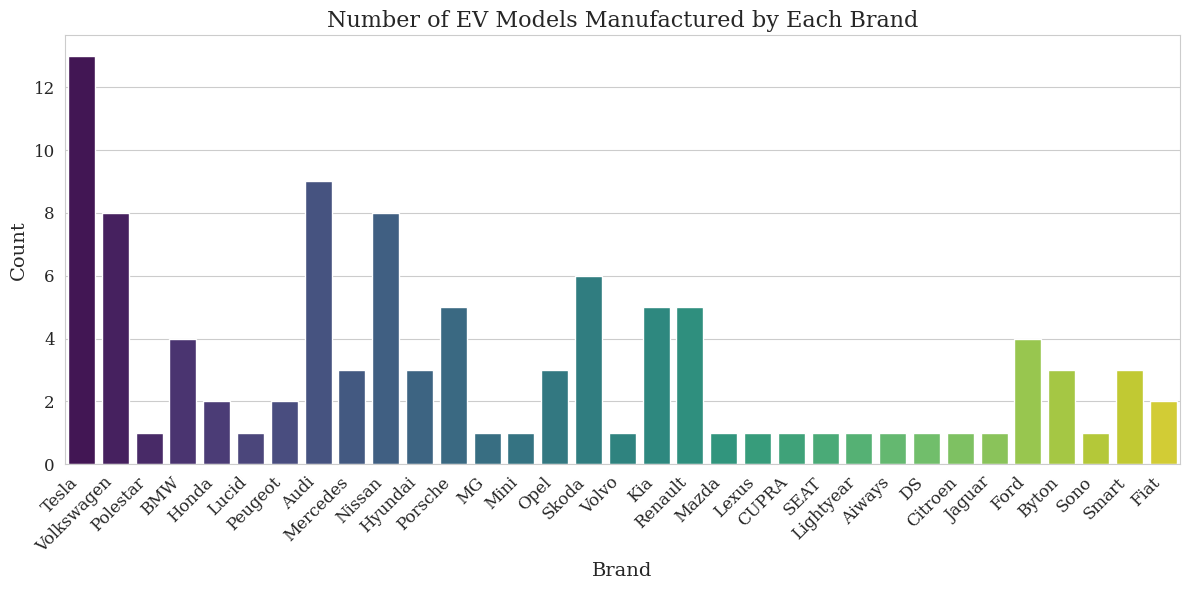

In [3]:
# Set the style of seaborn
sns.set_style("whitegrid")

# Plotting the count of EV models per brand
plt.figure(figsize=(12, 6))
sns.countplot(data=df3, x='Brand', palette='viridis')
sns.despine(right=False, top=False)
plt.xticks(rotation=45, ha='right', fontsize=12, family='serif')
plt.yticks(fontsize=12, family='serif')
plt.xlabel('Brand', fontsize=14, family='serif')
plt.ylabel('Count', fontsize=14, family='serif')
plt.title('Number of EV Models Manufactured by Each Brand', fontsize=16, family='serif')

# Save the figure
plt.tight_layout()
plt.savefig('EV_Models_By_Brand.png', dpi=300)

# Display the plot
plt.show()

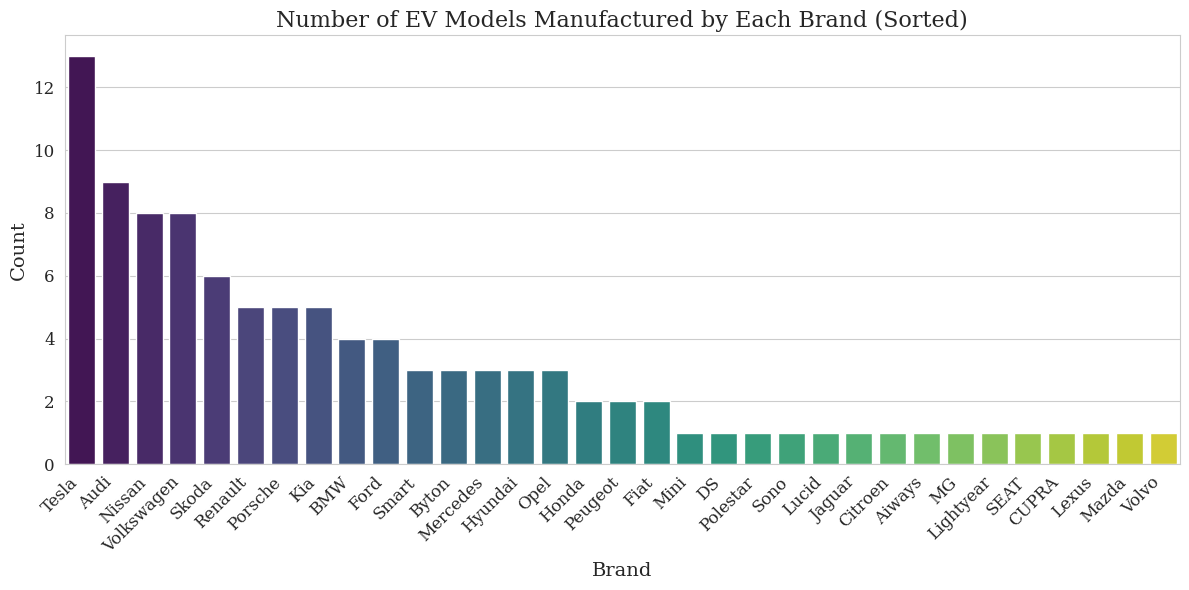

In [4]:
# Get the count of EV models per brand and sort the values
brand_counts = df3['Brand'].value_counts().sort_values(ascending=False)

# Create a new DataFrame with the sorted values
sorted_df = pd.DataFrame({'Brand': brand_counts.index, 'Count': brand_counts.values})

# Set the style of seaborn
sns.set_style("whitegrid")

# Plotting the count of EV models per brand
plt.figure(figsize=(12, 6))
sns.barplot(data=sorted_df, x='Brand', y='Count', palette='viridis')
sns.despine(right=False, top=False)
plt.xticks(rotation=45, ha='right', fontsize=12, family='serif')
plt.yticks(fontsize=12, family='serif')
plt.xlabel('Brand', fontsize=14, family='serif')
plt.ylabel('Count', fontsize=14, family='serif')
plt.title('Number of EV Models Manufactured by Each Brand (Sorted)', fontsize=16, family='serif')

# Save the figure
plt.tight_layout()
plt.savefig('Sorted_EV_Models_By_Brand.png', dpi=300)

# Display the plot
plt.show()

## **Electric Vehicles: Different Body Types:**

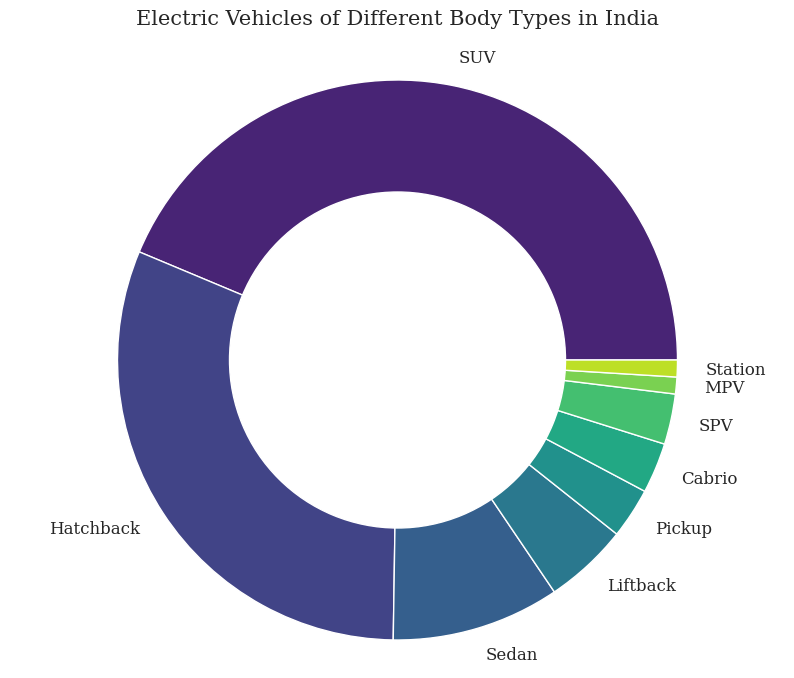

In [5]:
# Set figure size and style
plt.figure(figsize=(10, 8))
sns.set_style("whitegrid")

# Plot pie chart for different body types of EVs
body_type_counts = df3['BodyStyle'].value_counts()
pie = body_type_counts.plot.pie(radius=2, startangle=0, colors=sns.color_palette('viridis', len(body_type_counts)),
                                textprops=dict(family='serif', fontsize=12))

# Set inner circle to create a donut chart effect
plt.pie(x=[1], radius=1.2, colors='white')

# Set title and adjust layout
plt.title(label='Electric Vehicles of Different Body Types in India', family='serif', size=15, pad=20)
plt.ylabel('')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show the plot
plt.show()

## **Different Segments of EVs:**

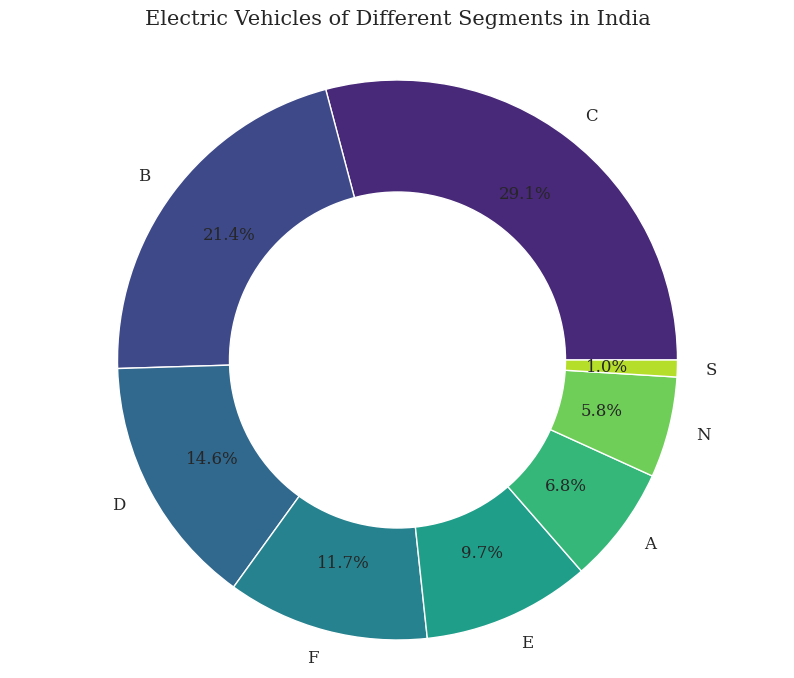

In [6]:

# Get counts of EVs by segment
segment_counts = df3['Segment'].value_counts()

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Plot pie chart for different segments of EVs
pie = segment_counts.plot.pie(ax=ax, radius=2, startangle=0, colors=sns.color_palette('viridis', len(segment_counts)),
                              autopct='%1.1f%%', pctdistance=0.75, textprops={'fontsize': 12, 'family': 'serif'})

# Draw inner circle to create a donut chart effect
plt.pie(x=[1], radius=1.2, colors='white')

# Set title and adjust layout
plt.title('Electric Vehicles of Different Segments in India', family='serif', size=15, pad=20)
plt.ylabel('')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Save the figure
plt.savefig('EV_Segments_Pie_Chart.png', dpi=300)

# Show the plot
plt.show()

## **Number of Seats:**

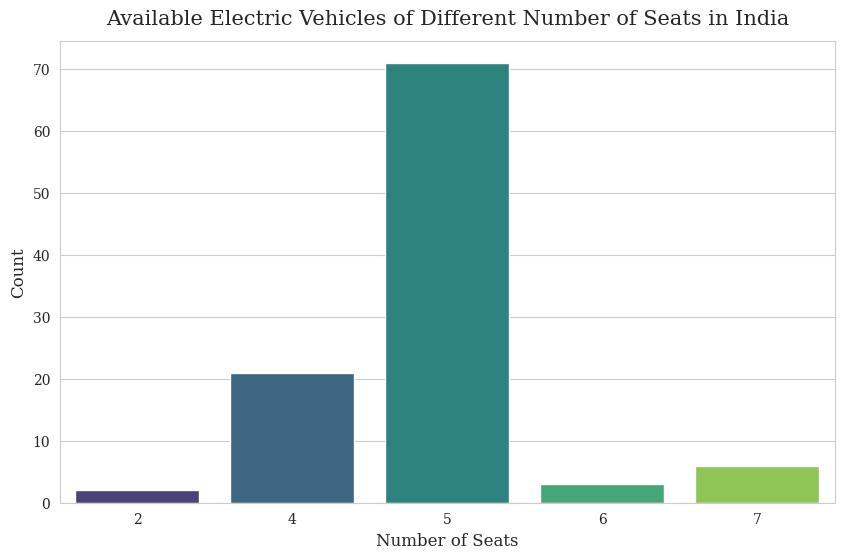

In [7]:
# Set the style of seaborn
sns.set_style("whitegrid")

# Plotting the count of EVs by number of seats
plt.figure(figsize=(10, 6))
sns.countplot(data=df3, x='Seats', palette='viridis')

# Add labels and title
plt.xlabel('Number of Seats', fontsize=12, family='serif')
plt.ylabel('Count', fontsize=12, family='serif')
plt.title('Available Electric Vehicles of Different Number of Seats in India', fontsize=15, family='serif', pad=12)

# Set font family for ticks
plt.xticks(fontname='serif')
plt.yticks(fontname='serif')

# Show the plot
plt.show()

## **Number of Seats by Brand:**

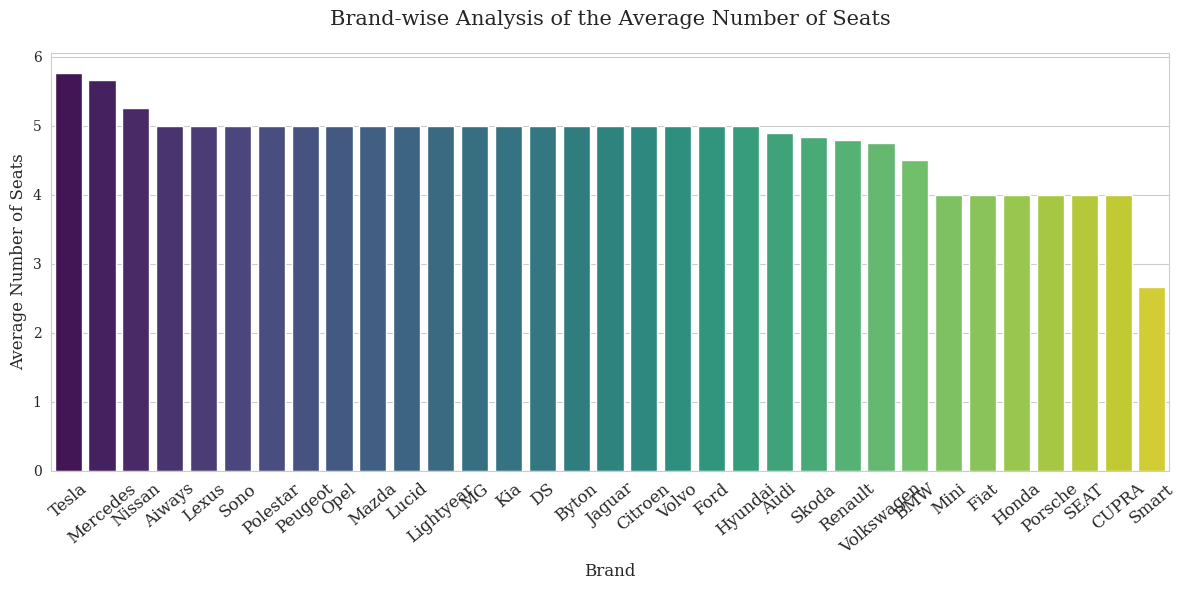

In [8]:
# Calculate average number of seats for each brand
brand_avg_seats = df3.groupby('Brand')['Seats'].mean().sort_values(ascending=False)

# Create a DataFrame for sorted average seats
sorted_df = brand_avg_seats.reset_index()

# Set the style of seaborn
sns.set_style("whitegrid")

# Plotting the brand-wise analysis of the number of seats
plt.figure(figsize=(12, 6))
sns.barplot(data=sorted_df, x='Brand', y='Seats', palette='viridis')

# Remove spines from the plot
sns.despine(right=False, top=False)

# Rotate x-axis labels for better readability
plt.xticks(rotation=40, fontsize=12, family='serif')

# Set labels and title
plt.xlabel('Brand', fontsize=12, family='serif')
plt.ylabel('Average Number of Seats', fontsize=12, family='serif')
plt.title('Brand-wise Analysis of the Average Number of Seats', fontsize=15, family='serif', pad=20)

# Set font family for ticks
plt.xticks(fontname='serif')
plt.yticks(fontname='serif')

# Save the figure
plt.tight_layout()
plt.savefig('Brandwise_Average_Seats_Analysis.png', dpi=300)

# Show the plot
plt.show()

## **Plug Type: Counts:**

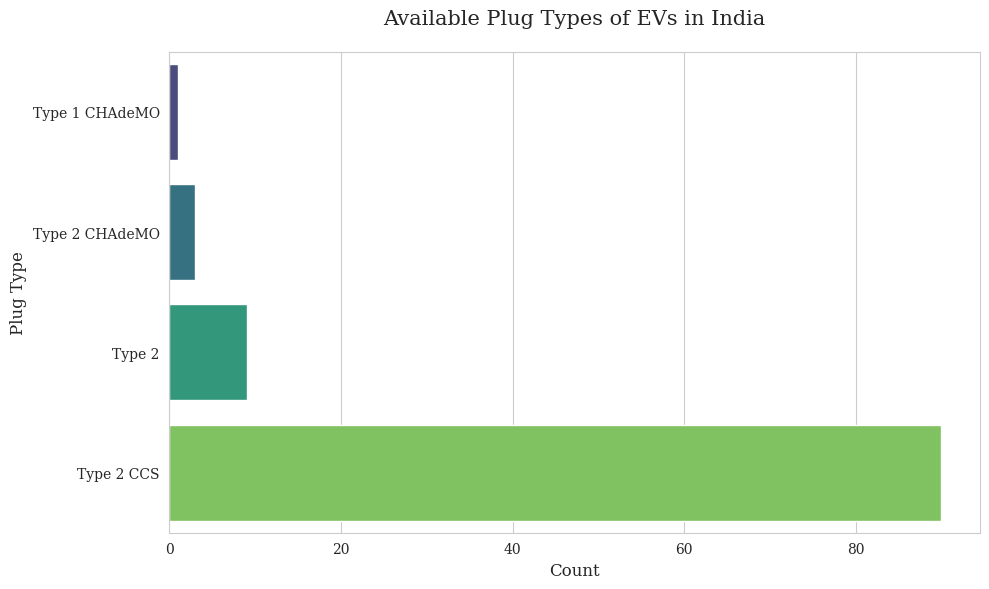

In [9]:
# Calculate plug type counts and sort them in ascending order
plug_type_counts = df3['PlugType'].value_counts().sort_values()

# Create horizontal bar plot for plug types
plt.figure(figsize=(10, 6))
sns.barplot(x=plug_type_counts.values, y=plug_type_counts.index, palette='viridis')

# Set labels and title
plt.xlabel('Count', fontsize=12, family='serif')
plt.ylabel('Plug Type', fontsize=12, family='serif')
plt.title('Available Plug Types of EVs in India', fontsize=15, family='serif', pad=20)

# Set font family for ticks
plt.xticks(fontname='serif')
plt.yticks(fontname='serif')

# Save the figure
plt.tight_layout()
plt.savefig('Plug_Type_Counts.png', dpi=300)

# Show the plot
plt.show()

## **Price Comparison:**

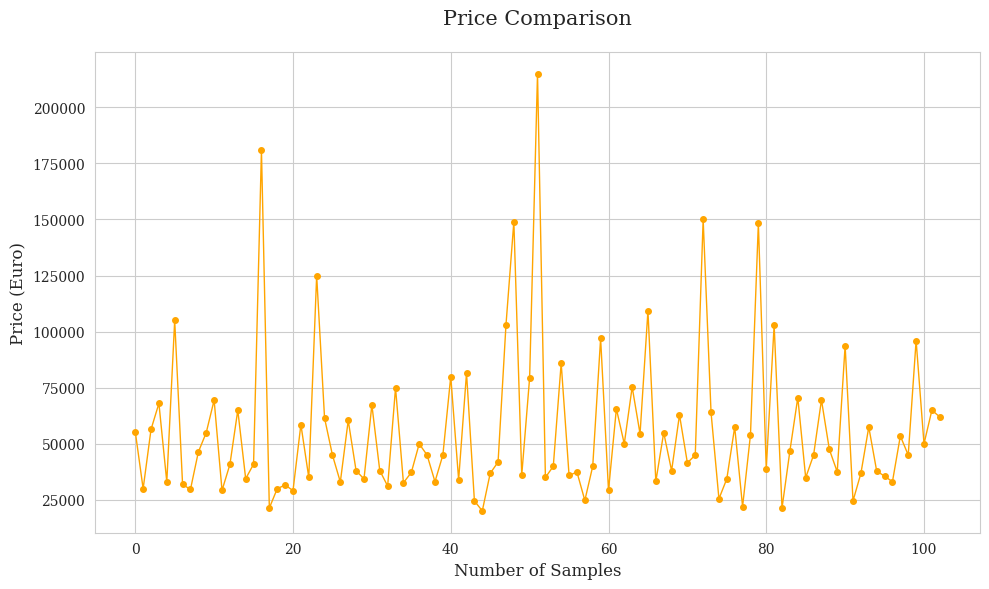

In [10]:
# Set the style of seaborn
sns.set_style("whitegrid")

# Plotting the price from dataset 3
plt.figure(figsize=(10, 6))
plt.plot(df3['PriceEuro'], color='orange', marker='o', markersize=4, linewidth=1)

# Set labels and title
plt.xlabel('Number of Samples', fontsize=12, family='serif')
plt.ylabel('Price (Euro)', fontsize=12, family='serif')
plt.title('Price Comparison', fontsize=15, family='serif', pad=20)

# Set font family for ticks
plt.xticks(fontname='serif')
plt.yticks(fontname='serif')

# Save the figure
plt.tight_layout()
plt.savefig('Price_Comparison.png', dpi=300)

# Show the plot
plt.show()

## **Electric Vehicles Based on Acceleration:**

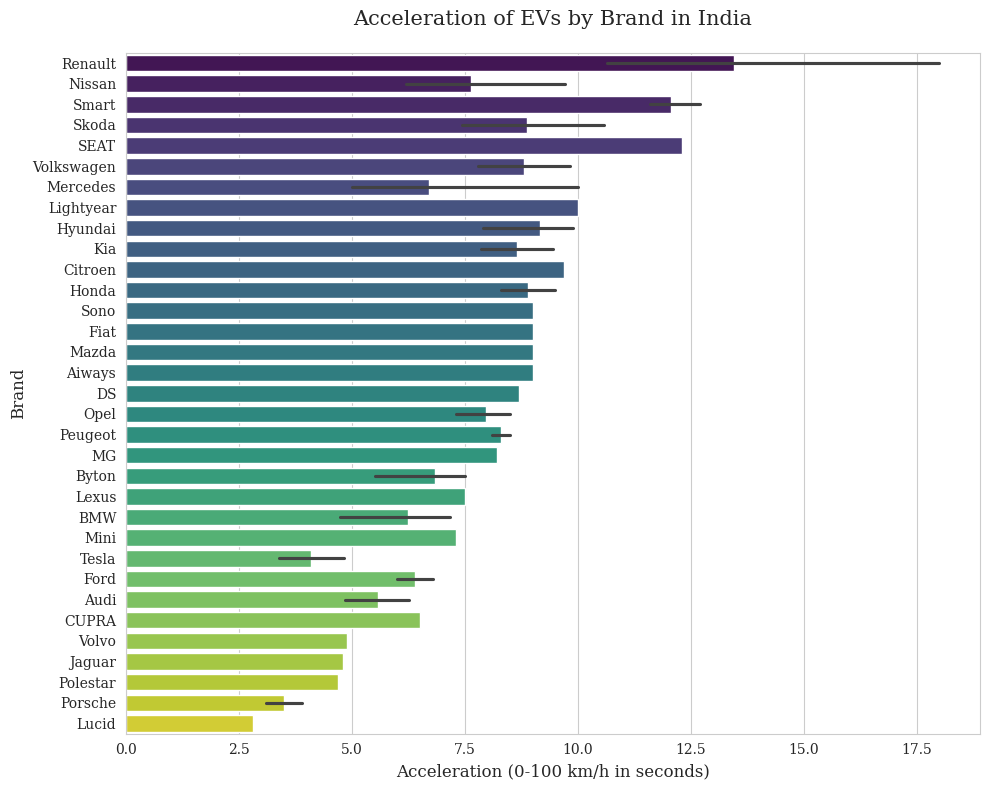

In [11]:

# Sort the DataFrame by acceleration (AccelSec)
df3_sorted = df3.sort_values(by='AccelSec', ascending=False)

# Set the style of seaborn
sns.set_style("whitegrid")

# Create a figure and axis
plt.figure(figsize=(10, 8))

# Plotting the acceleration of EVs in India
sns.barplot(data=df3_sorted, y='Brand', x='AccelSec', palette='viridis')

# Set labels and title
plt.xlabel('Acceleration (0-100 km/h in seconds)', fontsize=12, family='serif')
plt.ylabel('Brand', fontsize=12, family='serif')
plt.title('Acceleration of EVs by Brand in India', fontsize=15, family='serif', pad=20)

# Set font family for ticks
plt.xticks(fontname='serif')
plt.yticks(fontname='serif')

# Save the figure
plt.tight_layout()
plt.savefig('EV_Acceleration_By_Brand_Sorted.png', dpi=300)

# Show the plot
plt.show()

## **Electric Vehicles based on Speed:**

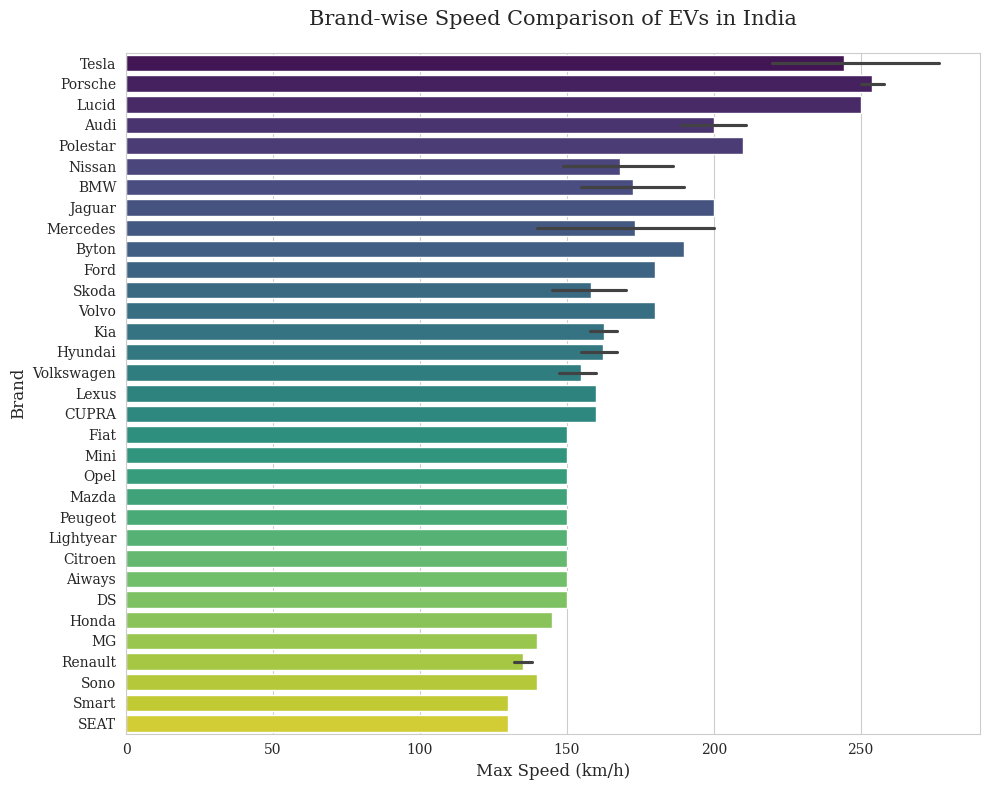

In [12]:
# Sort the DataFrame by top speed (TopSpeed_KmH)
df3_sorted = df3.sort_values(by='TopSpeed_KmH', ascending=False)

# Set the style of seaborn
sns.set_style("whitegrid")

# Create a figure and axis
plt.figure(figsize=(10, 8))

# Plotting the speed comparison of EVs in India
sns.barplot(data=df3_sorted, x='TopSpeed_KmH', y='Brand', palette='viridis')

# Set labels and title
plt.xlabel('Max Speed (km/h)', fontsize=12, family='serif')
plt.ylabel('Brand', fontsize=12, family='serif')
plt.title('Brand-wise Speed Comparison of EVs in India', fontsize=15, family='serif', pad=20)

# Set font family for ticks
plt.xticks(fontname='serif')
plt.yticks(fontname='serif')

# Save the figure
plt.tight_layout()
plt.savefig('EV_Speed_Comparison_By_Brand_Sorted.png', dpi=300)

# Show the plot
plt.show()

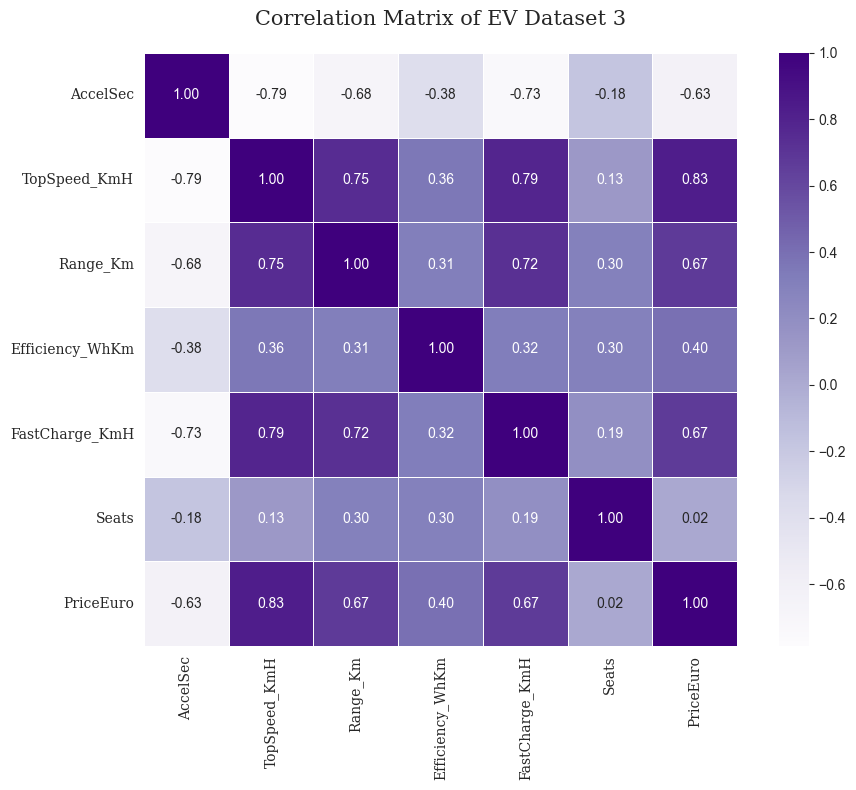

In [13]:
# Selecting numeric columns only
numeric_df = df3.select_dtypes(include=['float64', 'int64'])

# Set the style of seaborn
sns.set_style("whitegrid")

# Create a figure and axis
plt.figure(figsize=(10, 8))

# Plotting the correlation matrix
sns.heatmap(data=numeric_df.corr(), annot=True, cmap='Purples', cbar=True, square=True, fmt='.2f', linewidths=0.5)

# Set title
plt.title('Correlation Matrix of EV Dataset 3', fontsize=15, family='serif', pad=20)

# Set font family for ticks
plt.xticks(fontname='serif')
plt.yticks(fontname='serif')

# Save the figure
plt.tight_layout()
plt.savefig('Correlation_Matrix.png', dpi=300)

# Show the plot
plt.show()

## **Electric Vehicles based on Range Parameter:**

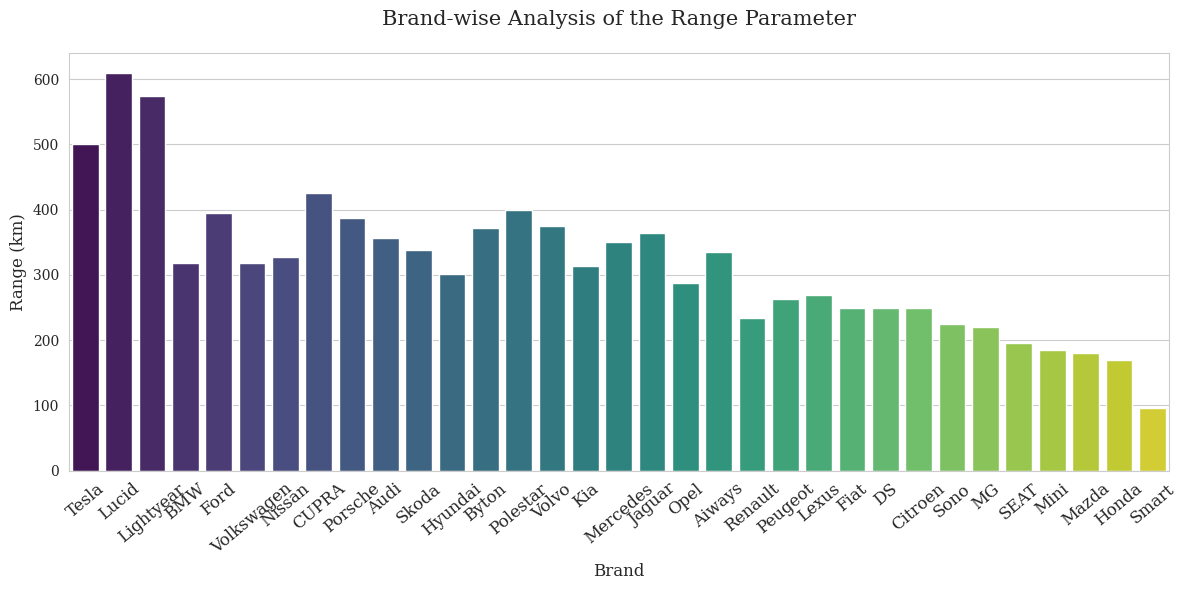

In [14]:
# Sort the DataFrame by range parameter (Range_Km)
df3_sorted = df3.sort_values(by='Range_Km', ascending=False)

# Set the style of seaborn
sns.set_style("whitegrid")

# Create a figure and axis
plt.figure(figsize=(12, 6))

# Plotting the brand-wise analysis of the range parameter
sns.barplot(data=df3_sorted, x='Brand', y='Range_Km', palette='viridis', ci=None)

# Rotate x-axis labels for better readability
plt.xticks(rotation=40, fontsize=12, family='serif')

# Set labels and title
plt.xlabel('Brand', fontsize=12, family='serif')
plt.ylabel('Range (km)', fontsize=12, family='serif')
plt.title('Brand-wise Analysis of the Range Parameter', fontsize=15, family='serif', pad=20)

# Set font family for ticks
plt.xticks(fontname='serif')
plt.yticks(fontname='serif')

# Save the figure
plt.tight_layout()
plt.savefig('Brandwise_Range_Parameter_Analysis_Sorted.png', dpi=300)

# Show the plot
plt.show()

## **Model Building using K-Means Clustering:**

In [15]:
# Encoding categorical features

# PowerTrain feature encoding: Replace categorical values with numerical values
# RWD (Rear-Wheel Drive) mapped to 0, FWD (Front-Wheel Drive) mapped to 1, AWD (All-Wheel Drive) mapped to 2
df3['PowerTrain'].replace(to_replace=['RWD', 'FWD', 'AWD'], value=[0, 1, 2], inplace=True)

# RapidCharge feature encoding: Replace categorical values with numerical values
# No mapped to 0, Yes mapped to 1
df3['RapidCharge'].replace(to_replace=['No', 'Yes'], value=[0, 1], inplace=True)

In [16]:
# Selecting features for building a model

# List of features selected for the model
selected_features = ['AccelSec', 'TopSpeed_KmH', 'Efficiency_WhKm', 'FastCharge_KmH', 'Range_Km', 'RapidCharge', 'Seats', 'PriceEuro', 'PowerTrain']

# Creating the feature matrix X by selecting columns from the DataFrame df3
X = df3[selected_features]

In [17]:
from sklearn.preprocessing import StandardScaler

# Feature scaling

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the features using StandardScaler
X_scaled = scaler.fit_transform(X)

In [18]:
# Applying Principal Component Analysis (PCA)

# Initialize PCA with the number of components
pca = PCA(n_components=9)

# Fit and transform the scaled features using PCA
X_pca = pca.fit_transform(X_scaled)

# Creating a DataFrame for the principal components
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9'])

# Displaying the first few rows of the PCA-transformed DataFrame
display(df_pca.head())

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,2.429225,-0.554599,-1.147772,-0.882791,0.839988,-0.959297,0.998880,0.711148,-0.396662
1,-2.322483,-0.345449,0.896473,-1.305529,0.079598,0.235116,-0.213678,-0.544135,-0.181867
2,1.587851,0.008899,-0.650523,0.041024,0.593537,-0.698248,0.058718,0.248837,-0.202775
3,0.291018,-0.000150,-0.307702,-0.514196,-1.608861,0.291624,0.364999,-0.235543,0.261663
4,-2.602679,-0.626489,-0.888088,0.585294,-0.802108,0.027387,-0.084955,-0.507790,-0.049904


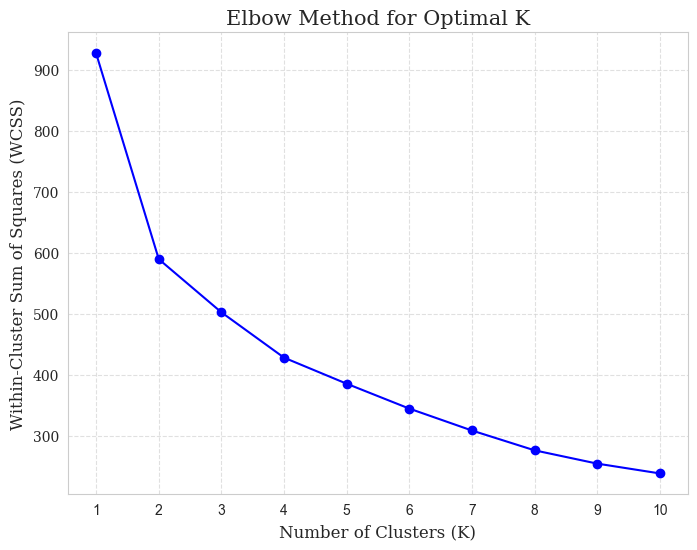

In [19]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Plotting the results of Elbow Method

# List to store the within-cluster sum of squares (WCSS) for each number of clusters
wcss = []

# Loop through a range of cluster numbers from 1 to 10
for i in range(1, 11):
    # Initialize KMeans with the current number of clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=90)
    
    # Fit KMeans to the PCA-transformed data and calculate WCSS
    kmeans.fit(X_pca)
    
    # Append the WCSS to the list
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='blue')
plt.title('Elbow Method for Optimal K', size=15, family='serif')
plt.xlabel('Number of Clusters (K)', size=12, family='serif')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)', size=12, family='serif')
plt.xticks(range(1, 11))
plt.yticks(family='serif')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tick_params(axis='both', direction='inout', length=6, color='purple', grid_color='lightgray', grid_linestyle='--')
plt.show()

In [20]:
from sklearn.cluster import KMeans

# Training the KMeans model with k=4

# Initialize KMeans with the number of clusters
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=90)

# Fit KMeans to the PCA-transformed data
kmeans.fit(X_pca)

KMeans(n_clusters=4, random_state=90)

In [21]:
# Print the labels assigned to each data point by the KMeans model
print(kmeans.labels_)

[0 3 2 1 1 0 3 3 1 2 2 1 1 2 3 1 0 1 3 1 1 2 1 0 0 1 1 2 3 3 2 1 1 2 1 1 1
 3 3 2 0 1 2 1 1 1 1 0 0 3 2 0 1 1 2 1 1 3 1 0 3 2 2 2 3 0 1 2 3 2 1 2 0 2
 1 1 2 3 2 0 1 2 3 1 2 1 2 2 2 1 2 3 3 2 1 1 1 3 1 2 2 2 2]


In [22]:
# Check the size of clusters

# Create a Series with cluster labels and count the occurrences of each label
cluster_sizes = pd.Series(kmeans.labels_).value_counts()

# Display the size of each cluster
print("Cluster Sizes:")
print(cluster_sizes)

Cluster Sizes:
1    39
2    32
3    19
0    13
Name: count, dtype: int64


In [23]:
# Adding a new feature of cluster labels to the dataset df3
df3['clusters'] = kmeans.labels_

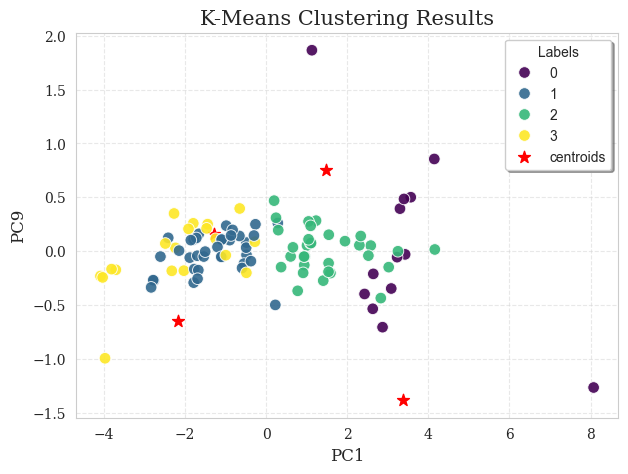

In [25]:
# Visualizing clusters

# Create a scatter plot of the first and ninth principal components (PC1 and PC9)
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df_pca, x='PC1', y='PC9', s=70, hue=kmeans.labels_, palette='viridis', zorder=2, alpha=0.9)

# Plot centroids
plt.scatter(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], marker="*", c="r", s=80, label="centroids")

# Set labels and title
plt.xlabel('PC1', family='serif', size=12)
plt.ylabel('PC9', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tick_params(grid_color='lightgray', grid_linestyle='--', zorder=1)
plt.legend(title='Labels', fancybox=True, shadow=True)
plt.title('K-Means Clustering Results', family='serif', size=15)

# Save the figure
plt.savefig('kmeans_clusters_visualization.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()